In [23]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

In [10]:
none = pd.read_csv("tip_attributes_none.tsv", sep="\t", usecols=["strain", "frequency"])

In [11]:
ideal = pd.read_csv("tip_attributes_ideal.tsv", sep="\t", usecols=["strain", "frequency"])

In [12]:
observed = pd.read_csv("tip_attributes_observed.tsv", sep="\t", usecols=["strain", "frequency"])

In [13]:
none.shape

(1167, 2)

In [14]:
ideal.shape

(1155, 2)

In [15]:
observed.shape

(1026, 2)

In [50]:
df = none.merge(
    ideal,
    on="strain",
    how="left",
    suffixes=["", "_ideal"],
).merge(
    observed,
    on="strain",
    how="left",
    suffixes=["", "_observed"],
).fillna(0.0)

In [51]:
df.head()

,strain,frequency,frequency_ideal,frequency_observed
0,A/AbuDhabi/12/2019,0.000010,0.000010,0.000015
1,A/AbuDhabi/14/2019,0.000010,0.000010,0.000015
2,A/AbuDhabi/19/2019,0.000011,0.000011,0.000017
3,A/AbuDhabi/21/2019,0.000011,0.000012,0.000018
4,A/AbuDhabi/22/2019,0.000012,0.000012,0.000019


In [52]:
df.shape

(1167, 4)

In [53]:
pd.isnull(df["frequency_observed"]).sum()

0

In [54]:
max_frequency = max(df["frequency"].max(), df["frequency_ideal"].max(), df["frequency_observed"].max())

In [55]:
max_frequency

0.004464

In [56]:
x = y = np.linspace(0, max_frequency, 10)

In [57]:
x

array([0.      , 0.000496, 0.000992, 0.001488, 0.001984, 0.00248 ,
       0.002976, 0.003472, 0.003968, 0.004464])

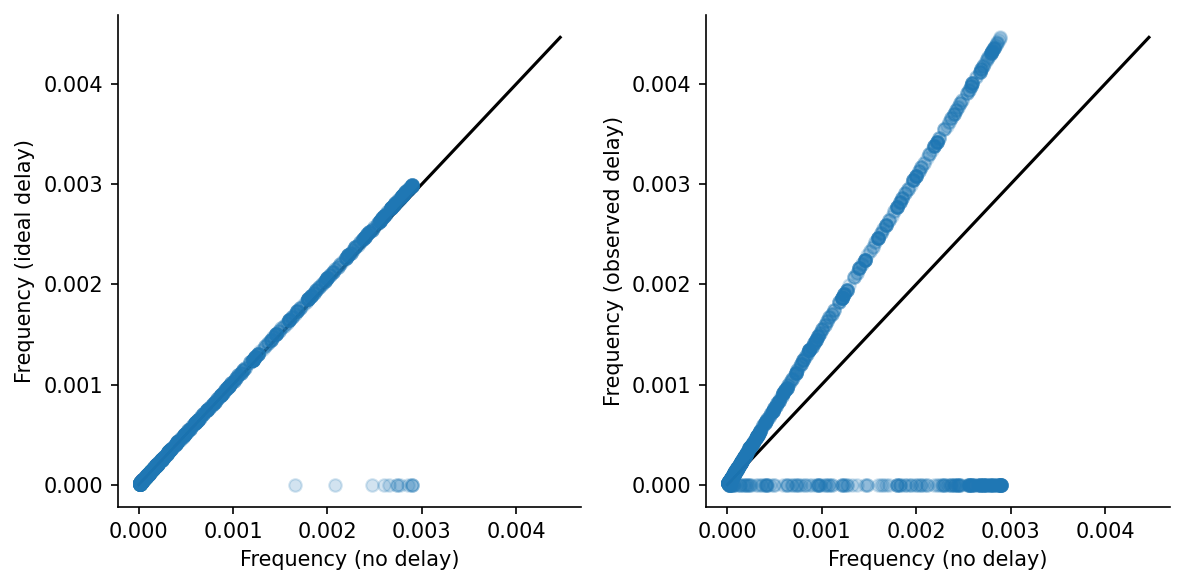

In [58]:
fig, axes = plt.subplots(1, 2, figsize=(8, 4), dpi=150)
all_axes = axes.flatten()

ax1 = all_axes[0]
ax1.plot(
    df["frequency"],
    df["frequency_ideal"],
    "o",
    alpha=0.2,
)
ax1.plot(x, y, color="black", zorder=-10)

ax1.set_xlabel("Frequency (no delay)")
ax1.set_ylabel("Frequency (ideal delay)")

ax2 = all_axes[1]
ax2.plot(
    df["frequency"],
    df["frequency_observed"],
    "o",
    alpha=0.2,
)
ax2.plot(x, y, color="black", zorder=-10)

ax2.set_xlabel("Frequency (no delay)")
ax2.set_ylabel("Frequency (observed delay)")

sns.despine()
plt.tight_layout()